# 실습 목표: 무신사 리뷰 감성분석

## 1. 크롤링
  - 크롤링 대상 URL : https://www.musinsa.com/goods/reviews/lists
  - 수집하고 싶은 리뷰 사이트는 변경 가능 (올리브영, 네이버 쇼핑 등)
  - 필수 수집 데이터 (별점, 리뷰 텍스트)
  - 추가 수집 데이터 (상품정보나 유저 정보 등)


In [56]:
headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'}
url = 'https://www.musinsa.com/goods/reviews/lists?type=style&searchYear=2023&maxRt=2023&minRt=2009&searchKeyword=&hashId=&page={}'

result = []
for page_number in range(1, 6):
    response = requests.get(url.format(page_number), headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    source = soup.select(".review-list")

    for i in source:
        brand = i.select_one(".review-goods-information__item").text.strip().split()[0]
        item = i.select_one(".review-goods-information__name").text
        review = i.select_one(".review-contents__text").text
        result.append({
            "brand" : brand,
            "item" : item,
            "review" : review
        })

In [71]:
source

[<div class="review-list">
 <div class="review-profile">
 <a class="review-profile__link" href="https://www.musinsa.com/app/reviews/lists?hash_id=7a40545771bd958f73cab8186f529180&amp;type=style">
 <img alt="프로필 이미지" class="review-profile__image" src="//image.msscdn.net/mfile_s01/_simbols/m/7a40545771bd958f73cab8186f529180.jpg"/>
 </a>
 <div class="review-profile__text-wrap">
 <div class="review-profile__text">
 <p class="review-profile__name">LV.6가루킴</p>
 <p class="review-profile__date">6시간 전</p>
 </div>
 <div class="review-profile__information">
 <p class="review-profile__body_information">여성 · 158cm · 48kg</p>
 <a class="report" onclick='ReviewEvent.reportReviewsPop("\/app\/cs\/report_pop\/EST\/47406313")' title="신고">신고</a>
 </div>
 </div>
 </div>
 <div class="review-goods-information">
 <div class="review-goods-information__thumbnail">
 <a class="review-goods-information__link" href="https://www.musinsa.com/app/goods/1900342/0">
 <img alt="FOREST WARS 반팔 티셔츠 White" class="review-goo

In [76]:
for i in source:
    rating = soup.select_one(".review-list__rating").
rating

<span class="review-list__rating">
<span class="review-list__rating__unit">
<span class="review-list__rating__active" style="width: 100%"></span>
</span>
</span>

In [57]:
result

[{'brand': '아웃스탠딩',
  'item': 'HAWAIIAN OPEN COLLAR HALF SHIRTS_TIGER BLACK',
  'review': '좋은 가격에 좋은 상품 좋게 구매한 거 같아요 흡족'},
 {'brand': '트릴리온',
  'item': '바이오스톤 워싱 섬머 쿨 와이드 데님 팬츠 (SUMMER BLUE)',
  'review': '사이즈가 많이 크게 나와서 기장 수선하고 허리는 벨트 차고 다녀요 그래도 퐁신한 핏이 예뻐서 애용 중입니다 여름에 입기 딱 좋은 청바지예요'},
 {'brand': '브랜디드',
  'item': '1880 PURE CREAM JEANS [WIDE STRAIGHT]',
  'review': '처음으로 밝은색 바지 입어보는데 너무 예쁜 것 같아요'},
 {'brand': '뉴에라',
  'item': '아웃도어 캘리포니아 리퍼블릭 티셔츠 엠버 옐로우',
  'review': '옷이 조큼 크게 나옷듯해요신랑이 175인데 넉넉하고 커보였어요재질도 괜찮고 색상이 너무예쁜거같아요!'},
 {'brand': '무신사',
  'item': '릴렉스 핏 크루 넥 반팔 티셔츠 2 [오트밀]',
  'review': '기존거보다 기장이 좀 더 길어져서 오버핏 느낌으로 좋습니다'},
 {'brand': '트릴리온',
  'item': '피그먼트 아치 스튜디오 반팔티셔츠 (WHITE)',
  'review': '청바지나 조거랑 입으면 딱 예쁠 것 같아요 정사이즈 핏으로 떨어지고 무난하게 늦봄 여름 초가을에 입기 좋습니다 비침이 엄청 큰 편은 아니에요'},
 {'brand': '인템포무드',
  'item': '컴뱃 포켓 카고 팬츠 _베이지',
  'review': '색감이 너무 이쁘고 손이 많이 가요 이쁘게 잘 입을게요 감사합니다'},
 {'brand': '마인드브릿지',
  'item': '[YOUTH]옥스포드오버핏반팔셔츠 - 4color MXWS3150',
  'review': '옷 색도 이쁘고 사이즈도 수선이 필요

In [59]:
target_review = []
for i in result:
    target_review.append(i['review'])

target_review

['좋은 가격에 좋은 상품 좋게 구매한 거 같아요 흡족',
 '사이즈가 많이 크게 나와서 기장 수선하고 허리는 벨트 차고 다녀요 그래도 퐁신한 핏이 예뻐서 애용 중입니다 여름에 입기 딱 좋은 청바지예요',
 '처음으로 밝은색 바지 입어보는데 너무 예쁜 것 같아요',
 '옷이 조큼 크게 나옷듯해요신랑이 175인데 넉넉하고 커보였어요재질도 괜찮고 색상이 너무예쁜거같아요!',
 '기존거보다 기장이 좀 더 길어져서 오버핏 느낌으로 좋습니다',
 '청바지나 조거랑 입으면 딱 예쁠 것 같아요 정사이즈 핏으로 떨어지고 무난하게 늦봄 여름 초가을에 입기 좋습니다 비침이 엄청 큰 편은 아니에요',
 '색감이 너무 이쁘고 손이 많이 가요 이쁘게 잘 입을게요 감사합니다',
 '옷 색도 이쁘고 사이즈도 수선이 필요 없어요! 여름에 입기 좋아요',
 '평소 좋아하던 스타일이라서 그런지 엄청 잘 입고 다닙니다~',
 '보들보들하니 신랑이 맘에들어해요! 재질이 참좋네요 또구매할꺼같아요!디자인도 괜찮고 배송도 좋았습니당',
 '색감이 살짝 짙은 하늘색 느낌이고 재질은 좋으나 땀 흘리면 티가 많이 나요 슬림핏이 아니라 핏은 보통 체형이면 예쁘게 떨어집니다',
 '쿨소재라 한여름에 잘 입고 다녔어요깔끔하고 이쁘구요옷은 오버핏으로 입기 좋아요',
 '평소 그레이색 바지를 자주 입고 다니는데 이번에도 자주 잘 입고 다닐 것 같아여!!',
 '친구랑 같은 사이즈 다른 색상으로 사 입었는데 디자인도 독특하고 유니크해서 꾸안꾸 느낌으로 잘 입고 있습니다 !! 색감 진짜 뚜렷하구 이쁨 !!',
 '흰옷에 입으니 묻어나더라구요ㅜㅜ오버핏으로 잘입고 다니네요여름에 입기에는 소재가 도톰해요',
 '가성비 최고 무탠다드 구르카 팬츠로 여름 잘 보냈습니다☺️',
 '블랙과 내이비 모두 샀는데 모두 맘이 들어요 활용성이 너무 좋을것 같아요☺️',
 '반바지에 투덕이라니 너무 예쁘고, 재질도 면이 아니라 더 이쁘고 오래입을수 있는 재질입니다. 정말 강추합니다!',
 '핏 너무 예뻐요! 날 살짝 풀려서 덜 더워지면 더

In [60]:
len(target_review)

100

In [68]:
rating = soup.select(".review-list__rating__active0")
rating

[]

## 2. 데이터 전처리
  - EDA (데이터 확인, 문장 길이 체크)
  - 감성분석 가능하도록 데이터 전처리 (텍스트, 라벨)
  - 사전학습 모델을 위한 tokenizer, input_transformer 정의
  - 데이터셋, 데이터로더 정의


In [67]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from kobert_transformers import get_kobert_model, get_distilkobert_model
from tokenization_kobert import KoBertTokenizer

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

import numpy as np

In [85]:
reviews = [l.split('spliter')[:2] for l in open('./musinsa_review').readlines()]

In [98]:
reviews[:5]

[['재질도 좋고 프린팅도 너무 맘에들어요 만족스럽습니다.', '5'],
 ['디자인은 무난하고 배송은 빨랐어요!!\t거격도 합리작입니다!!', '4'],
 ['배송도 빠르고 세일 기간에 저렴하게 잘 구매했습니다.', '5'],
 ['배송도 빠르고 세일 기간에 저렴하게 잘 구매했습니다.', '5'],
 ['배송도 빠르고 세일 기간에 저렴하게 잘 구매했습니다.', '5']]

In [91]:
train_len = int(len(reviews) * 0.8)
train_len

271344

In [92]:
train_reviews = [l.split('spliter')[:2] for l in open('./musinsa_review').readlines()[:train_len]]
test_reviews = [l.split('spliter')[:2] for l in open('./musinsa_review').readlines()[train_len + 1:]]

In [93]:
train_reviews[:5]

[['재질도 좋고 프린팅도 너무 맘에들어요 만족스럽습니다.', '5'],
 ['디자인은 무난하고 배송은 빨랐어요!!\t거격도 합리작입니다!!', '4'],
 ['배송도 빠르고 세일 기간에 저렴하게 잘 구매했습니다.', '5'],
 ['배송도 빠르고 세일 기간에 저렴하게 잘 구매했습니다.', '5'],
 ['배송도 빠르고 세일 기간에 저렴하게 잘 구매했습니다.', '5']]

In [94]:
test_reviews[:5]

[['여름에 쓰기 적당한 크림이에요 기름지거나 무겁지 않지만 그렇다고 너무 가벼워서 건조할 정도도 아니에요 향은 거의 없고 발림성은 좋은데 흡수되는게 약간 시간이 걸리는 느낌은 있어요',
  '5'],
 ['써본 쉐딩중에 제일 자연스럽고 코에 쓰기 적절해요! 밝은 컬러쪽은 손등색이랑 거의 비슷하고 톤이 맞아서 좋았어요', '5'],
 ['촉촉함이 바로 사라질 줄 알았는데 음식을 먹으면 당연히사라지지만 그렇지않으면 꽤 오래가요 좋습니다', '5'],
 ['팔 안쪽에 해봤는데 시원해지긴해요 그대신 문지르고 좀 말려야 보송해지는 것 같아요! 안하는 것보다는 한 게 낫긴하지만 다른 제품도 한번 사용해보려고요',
  '4'],
 ['선크림 특유의 꼬릿한 냄새는 어쩔수 없고 발림성은 최고에요!', '5']]

In [148]:
for i, (d, _) in enumerate(train_reviews):
    ...

ValueError: not enough values to unpack (expected 2, got 1)

In [150]:
train_reviews[i]

['확실히 가격대가 있으니 디테일이나 마감처리 부분이 상당히 좋네요\n']

In [153]:
train_reviews[-1]

['손등에 올릴때는 예쁜데 입술에 올리면 생각보다 핑키해요ㅠ 그래도 발림성은 좋아요!', '4']

In [147]:
train_sentences = [item[0] for item in train_reviews]
train_labels = [int(item[1]) for item in train_reviews]
test_sentences = [item[0] for item in test_reviews]
test_labels = [int(item[1]) for item in test_reviews]

IndexError: list index out of range

In [146]:
train_sentences, train_labels = list(zip(*[(sentence, int(label)) for sentence, label in train_reviews]))
test_sentences, test_labels = list(zip(*[(sentence, int(label)) for sentence, label in test_reviews]))

ValueError: not enough values to unpack (expected 2, got 1)

In [177]:
len(train_reviews), len(test_reviews)

(271344, 67836)

In [176]:
filtered_train_reviews = list(filter(lambda x: len(x) == 2, train_reviews))
filtered_test_reviews = list(filter(lambda x: len(x) == 2, test_reviews))

In [178]:
len(filtered_train_reviews), len(filtered_test_reviews)

(271328, 67818)

In [180]:
train_sentences, train_labels = list(zip(*[(sentence, int(label)) for sentence, label in filtered_train_reviews]))
test_sentences, test_labels = list(zip(*[(sentence, int(label)) for sentence, label in filtered_test_reviews]))

## EDA

In [181]:
sent_len = [len(s) for s in train_sentences]
max(sent_len), min(sent_len), sum(sent_len)/len(sent_len)

(1232, 20, 52.483986171718364)

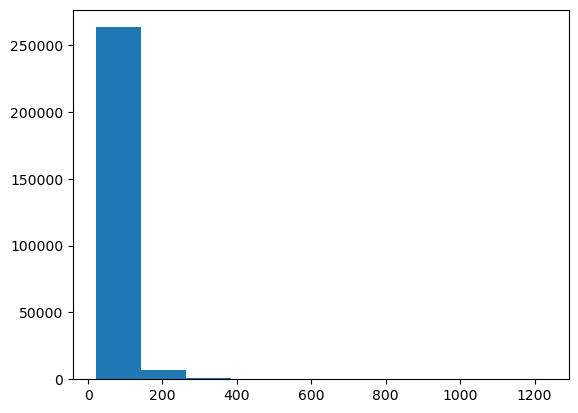

In [182]:
import matplotlib.pyplot as plt

plt.hist(sent_len)
plt.show()

## Configs 설정

In [183]:
max_len = 128 # 문장 최대길이, EDA 필요
batch_size = 64

In [184]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## input transformer

In [186]:
class InputTransformer:

    def __init__(self, tokenizer, max_len=128):
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.pad_token = tokenizer.convert_tokens_to_ids(['[PAD]'])[0]

    def transform(self, sentences):
        # 성능개선필요 https://github.com/monologg/KoBERT-nsmc/blob/master/data_loader.py
        tokenized = [self.tokenizer.tokenize(sentence) for sentence in sentences]
        input_ids = [self.tokenizer.convert_tokens_to_ids(['[CLS]'] + tokens + ['[SEP]'])[:self.max_len]
                     for tokens in tokenized]
        valid_lengths = [input_id.index(3) if len(input_id) < self.max_len else self.max_len for input_id in input_ids]
        token_ids = [np.array(input_id + [self.pad_token]*(self.max_len-valid_lengths[i]-1)) for i, input_id in enumerate(input_ids)]
        segment_ids = [np.zeros(self.max_len) for i in range(len(sentences))]

        return list(zip(token_ids, valid_lengths, segment_ids))

# class InputTransformer:

#     def __init__(self, tokenizer, max_len=128):
#         self.tokenizer = tokenizer
#         self.max_len = max_len
#         self.pad_token = tokenizer.convert_tokens_to_ids(['[PAD]'])[0]

#     def transform(self, sentences):
#         inputs = [self.tokenizer(sentence,
#                                  padding='max_length',
#                                  max_length=self.max_len,
#                                  truncation=True)
#                                  for sentence in sentences] #{input_ids, token_type_ids, attention_mask}

#         return inputs

## Bert dataset

In [187]:
class BERTDataset(Dataset):

    def __init__(self, transformer, sentences, labels=()):
        self.sentences = transformer.transform(sentences)
        self.is_test = False if labels else True
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __getitem__(self, i):
        return self.sentences[i], self.labels[i] if not self.is_test else _

    def __len__(self):
        return len(self.sentences)

In [188]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')
input_transformer = InputTransformer(tokenizer, max_len)

# train & test 데이터로 나누기
from sklearn.model_selection import train_test_split

trn_sents, valid_sents, trn_labels, valid_labels = train_test_split(train_sentences, train_labels, test_size=0.25, random_state=0, stratify=train_labels, shuffle=True)

train_dataset = BERTDataset(input_transformer, trn_sents, trn_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0)

valid_dataset = BERTDataset(input_transformer, valid_sents, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=0)

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

c:\Users\user\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'KoBertTokenizer'.


In [189]:
length_list = [l for _, l, _ in train_dataset.sentences]

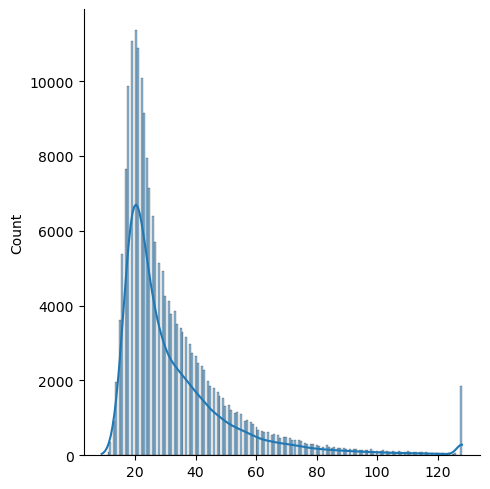

In [190]:
import seaborn as sns

sns.displot(length_list, kde=True)

## 3. 모델링
  - 사전학습 모델 선택, pretrained weight 가져오기
  - 모델 커스터마이징 (가져오는 모델에 따라서 num_labels를 수정하거나 linear layer 추가)

In [191]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
        self.classifier = nn.Linear(hidden_size , num_classes)

        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)

        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1

        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(),
                              attention_mask = attention_mask.to(token_ids.device), return_dict=False)

        if self.dr_rate:
            out = self.dropout(pooler)

        return self.classifier(out)

kobert = get_kobert_model()
model = BERTClassifier(kobert, dr_rate=0.5).to(device)

Downloading:   0%|          | 0.00/369M [00:00<?, ?B/s]

## 4. 학습
  - 옵티마이저, 손실함수 지정
  - warmup scheduler 적용
  - 학습, 검증

In [192]:
num_epochs = 5
learning_rate = 5e-5
warmup_ratio = 0.1
max_grad_norm = 1
log_interval = 50

In [193]:
model # 모델 구조 확인

# 이름으로 가중치 freeze
for name, param in model.named_parameters():
    if name in ['가중치 학습할 layers']:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [194]:
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

# weight freeze
for param in model.bert.parameters():
    param.requires_grad = False

# for param in model.parameters():
#     param.requires_grad = False

# for param in model.features[-1].parameters():
#     param.requires_grad = True


# 옵티마이저, 손실함수 지정
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=1e-8)
loss_fn = nn.CrossEntropyLoss().cuda()

t_total = len(train_loader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

c:\Users\user\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [195]:
from tqdm.auto import tqdm

In [196]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return acc

In [197]:
from copy import deepcopy

In [198]:
loss_history = [] # 전체 loss
avg_loss_hisroty = [] # epoch별 평균 loss
test_history = [] # validation accuracy
test_loss_history = [] # epoch별 평균 validation loss

best_acc = 0.0
best_acc_model = deepcopy(model)
for e in range(num_epochs):
    total_loss=0.0
    train_acc = 0.0
    test_acc = 0.0
    test_total_loss=0.0

    model.train() #훈련 선언
    for batch_id, ((token_ids, valid_length, segment_ids), label) in enumerate(tqdm(iter(train_loader))):
        optimizer.zero_grad()
        token_ids = token_ids.to(device)
        segment_ids = segment_ids.to(device)
        valid_length= valid_length
        label = label.to(device)
        out = model(token_ids, valid_length, segment_ids)

        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule

        train_acc += calc_accuracy(out, label)

        if (batch_id+1) % log_interval == 0:
            print("[train]\tepoch: {}\t batch id: {}/{}\t train_loss: {:.4f}\t train_acc: {:.4f}".format(e+1, batch_id+1,
                len(train_loader), loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            loss_history.append(loss.data.cpu().numpy())
            total_loss+=loss.data.cpu().numpy()

    avg_loss=total_loss/len(train_loader) #epoch별 평균 loss값
    avg_loss_hisroty.append(avg_loss)

    model.eval() #모델평가
    for batch_id, ((token_ids, valid_length, segment_ids), label) in enumerate(tqdm(iter(valid_loader))):
        token_ids = token_ids.to(device)
        segment_ids = segment_ids.to(device)
        valid_length= valid_length
        label = label.to(device)
        with torch.no_grad():
            out = model(token_ids, valid_length, segment_ids)
            loss = loss_fn(out, label).detach()
            test_acc += calc_accuracy(out, label)
            test_total_loss += loss.data.cpu().numpy()
        test_history.append(test_acc / (batch_id+1))

    test_avg_loss=test_total_loss/len(valid_loader)
    test_loss_history.append(test_avg_loss)
    print("[valid]\tepoch: {}\t valid loss: {:.4f}\t valid acc: {:.4f}".format(e+1, test_avg_loss,
        test_acc/len(valid_loader)))

    if (test_acc / (batch_id+1)) > best_acc:
          best_acc = (test_acc / (batch_id+1))
          best_acc_model = deepcopy(model)


  0%|          | 0/3180 [00:00<?, ?it/s]

In [ ]:
best_acc

In [ ]:
test_acc/(batch_id+1)

## 5. 예측
  - 새로운 리뷰 데이터셋에 대하여 예측 (테스트셋)
  - predict 함수 정의 (문장 -> 라벨 반환)

In [ ]:
predict_dataset = BERTDataset(input_transformer, test_sentences[:256], test_labels)
test_loader = torch.utils.data.DataLoader(predict_dataset, batch_size=batch_size, num_workers=2)

In [ ]:
# parameter를 test_sentences로 받기
def predict(model, test_sentences, test_labels, device):
    # dataset, dataloader 정의
    pred_dataset = BERTDataset(input_transformer, test_sentences, test_labels)
    test_loader = torch.utils.data.DataLoader(pred_dataset, batch_size=batch_size, num_workers=0)

    model.eval() # gpu
    test_loss = 0.0
    test_acc = 0.0
    preds = torch.tensor([], dtype=torch.long) # cpu
    for (token_ids, valid_length, segment_ids), label in test_loader:
        token_ids = token_ids.to(device)
        segment_ids = segment_ids.to(device)
        valid_length = valid_length
        label = label.to(device)

        with torch.no_grad():
            out = model(token_ids, valid_length, segment_ids) # gpu
            loss = loss_fn(out, label).detach()
            test_acc += calc_accuracy(out, label)
            test_loss += loss.data.cpu().numpy()
            # print(out.shape) # batch_size, output (64, 2)
            pred = torch.argmax(out, dim=1) # (64, ) # gpu
            # out에 argmax 적용 (긍정, 부정 라벨 체크)
            # torch.cat (데이터 개수만큼 concat)
            preds = torch.cat([preds, pred.detach().cpu()])
    print(preds)

    preds = ['긍정' if pred == 1 else '부정' for pred in preds]

    return list(zip(test_sentences, preds)) # (1:1로 묶어서 반환)
    return test_loss/len(test_loader), test_acc/len(test_loader)

In [ ]:
predict(model, test_sentences[:64], test_labels, device)

In [ ]:
predict(model, test_loader, device)

# 0.5423678532242775
# 0.4374503493309021